In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
# Load Data
credit_data = pd.read_csv('creditcard.csv', nrows=40000) # https://www.kaggle.com/mlg-ulb/creditcardfraud
# Display Data
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Scale Data (Mean = 0, SD = 1) NOTE: WE DO NOT NEED TO SCALE RANDOM/ISOLATION Forest data
scaler = StandardScaler().fit_transform(credit_data.loc[:,credit_data.columns!='Class'])
scaled_data = scaler[0:40000]
# Dataframe Creation: The dataset is assigned to a new dataframe df.
df = pd.DataFrame(data=scaled_data)
# Separate features and target variable
# Separating Features and Target: The dataset is split into X (features) and y (target). X contains all the columns except the Class column (which indicates whether a transaction is fraudulent or not), and y contains the Class column.
X = credit_data.drop(columns=['Class'])
y = credit_data['Class']

In [10]:
# Determine the fraction of outliers
# Outlier Fraction: The ratio of fraudulent transactions (Class=1) to normal transactions (Class=0) is calculated. This fraction helps the model understand the expected proportion of anomalies.
outlier_fraction = len(credit_data[credit_data['Class']==1])/float(len(credit_data[credit_data['Class']==0]))
# Create and fit the Isolation Forest model
# Model Initialization: An Isolation Forest model is created with 100 estimators (trees). The contamination parameter is set to the previously calculated outlier fraction, guiding the model on how many data points are likely to be anomalies. random_state=42 ensures reproducibility.
# Model Training: The model is trained on the entire dataset (df), learning how to isolate data points that are different from the majority.
model =  IsolationForest(n_estimators=100, contamination=outlier_fraction, random_state=42)
model.fit(df)

IsolationForest(contamination=0.0026067776218167233, random_state=42)

In [11]:
# Predict outliers
# Predicting Anomalies: The model makes predictions on the dataset. scores_prediction contains the anomaly scores (how isolated a point is), while y_pred holds the model's binary predictions (1 for anomalies and 0 for normal points).
# Adjusting Predictions: The Isolation Forest model returns -1 for anomalies and 1 for normal points. These predictions are inverted to match the convention of 1 for anomalies and 0 for normal points.
# Accuracy Calculation: The accuracy of the model's predictions is calculated by comparing y_pred with the true labels y. The accuracy score indicates how well the model has identified anomalies.
scores_prediction = model.decision_function(df)
y_pred = model.predict(df)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
# Print the accuracy in separating outliers or anomalies
print("Accuracy in finding anomaly:",accuracy_score(y,y_pred))

Accuracy in finding anomaly: 0.997425


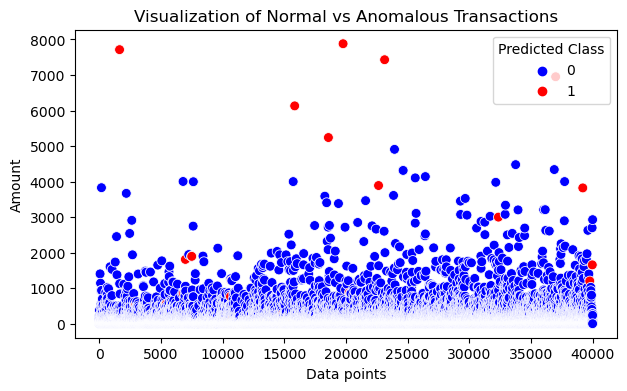

In [12]:
# Selecting the feature for y-axis
y_feature = credit_data['Amount']    # change the feature name to visualize another

# Adding the predicted labels to the original dataset
credit_data['predicted_class'] = y_pred

# Plotting the graph
# Plotting: A scatter plot is created using Seaborn. Data points are plotted on the x-axis (indices) and y-axis (transaction amounts). The points are colored based on their predicted class: normal transactions (0) are blue, and anomalies (1) are red. The plot helps visually distinguish between normal and anomalous transactions.
plt.figure(figsize=(7, 4))
sns.scatterplot(x=credit_data.index, y=y_feature, hue=credit_data['predicted_class'], palette={0: 'blue', 1: 'red'}, s=50)
plt.title('Visualization of Normal vs Anomalous Transactions')
plt.xlabel('Data points')
plt.ylabel(y_feature.name)
plt.legend(title='Predicted Class', loc='best')
plt.show()

In [ ]:
# Sources:
# https://www.kaggle.com/mlg-ulb/creditcardfraud
# https://www.geeksforgeeks.org/anomaly-detection-using-isolation-forest/
# https://www.geeksforgeeks.org/what-is-isolation-forest/